In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prix_kWh = 0.1544 # en €, pas de prise en compte heures pleines/creuses ici
prix_Wh = prix_kWh/1000 

# According to Direct Energie, ma conso annuel
# 10300 kW in 2020
# 7000 kW something in 2021

In [25]:
info = pd.date_range('1/1/2013', periods=6, freq='H')
series = pd.Series(range(6), index=info)

In [26]:
series

2013-01-01 00:00:00    0
2013-01-01 01:00:00    1
2013-01-01 02:00:00    2
2013-01-01 03:00:00    3
2013-01-01 04:00:00    4
2013-01-01 05:00:00    5
Freq: H, dtype: int64

In [27]:

series_bis = series.resample('30min').sum()
series_bis

2013-01-01 00:00:00    0.0
2013-01-01 00:30:00    0.0
2013-01-01 01:00:00    0.5
2013-01-01 01:30:00    0.0
2013-01-01 02:00:00    1.0
2013-01-01 02:30:00    0.0
2013-01-01 03:00:00    1.5
2013-01-01 03:30:00    0.0
2013-01-01 04:00:00    2.0
2013-01-01 04:30:00    0.0
2013-01-01 05:00:00    2.5
Freq: 30T, dtype: float64

In [9]:
data_path = './data/Enedis_Conso_Heure_20191229-20211217_23105354542081.csv'

In [10]:
df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1])
df.Horodate = pd.to_datetime(df.Horodate, utc=True)
df = df.set_index('Horodate')
#df.index = df.index.tz_convert("Europe/London")

In [12]:
df.head()

,Valeur
Horodate,
2020-06-15 03:00:00+00:00,1200.0
2020-06-15 04:00:00+00:00,464.0
2020-06-15 05:00:00+00:00,549.0
2020-06-15 06:00:00+00:00,1664.0
2020-06-15 07:00:00+00:00,337.0


In [7]:
print(df.dtypes)
print(df.index)

Valeur    float64
dtype: object
DatetimeIndex(['2020-06-15 03:00:00+00:00', '2020-06-15 04:00:00+00:00',
               '2020-06-15 05:00:00+00:00', '2020-06-15 06:00:00+00:00',
               '2020-06-15 07:00:00+00:00', '2020-06-15 08:00:00+00:00',
               '2020-06-15 09:00:00+00:00', '2020-06-15 10:00:00+00:00',
               '2020-06-15 11:00:00+00:00', '2020-06-15 12:00:00+00:00',
               ...
               '2021-12-16 18:30:00+00:00', '2021-12-16 19:00:00+00:00',
               '2021-12-16 19:30:00+00:00', '2021-12-16 20:00:00+00:00',
               '2021-12-16 20:30:00+00:00', '2021-12-16 21:00:00+00:00',
               '2021-12-16 21:30:00+00:00', '2021-12-16 22:00:00+00:00',
               '2021-12-16 22:30:00+00:00', '2021-12-16 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horodate', length=22460, freq=None)


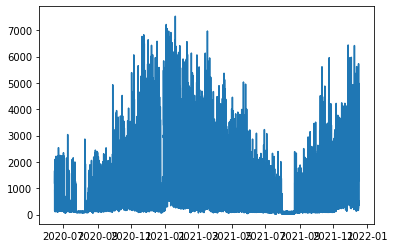

In [8]:
plt.plot(df)

In [397]:
df_h.index

DatetimeIndex(['2020-06-15 03:00:00+00:00', '2020-06-15 04:00:00+00:00',
               '2020-06-15 05:00:00+00:00', '2020-06-15 06:00:00+00:00',
               '2020-06-15 07:00:00+00:00', '2020-06-15 08:00:00+00:00',
               '2020-06-15 09:00:00+00:00', '2020-06-15 10:00:00+00:00',
               '2020-06-15 11:00:00+00:00', '2020-06-15 12:00:00+00:00',
               ...
               '2021-12-16 14:00:00+00:00', '2021-12-16 15:00:00+00:00',
               '2021-12-16 16:00:00+00:00', '2021-12-16 17:00:00+00:00',
               '2021-12-16 18:00:00+00:00', '2021-12-16 19:00:00+00:00',
               '2021-12-16 20:00:00+00:00', '2021-12-16 21:00:00+00:00',
               '2021-12-16 22:00:00+00:00', '2021-12-16 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horodate', length=13197, freq='H')

In [406]:
df_y = df_h.resample('Y').sum()
print(df_y)

                               Valeur
Horodate                             
2020-12-31 00:00:00+00:00   6958980.0
2021-12-31 00:00:00+00:00  19587186.0


In [407]:
df_y['kW'] = df_y['Valeur']/1000
df_y['cout'] = df_y['Valeur']*prix_Wh
print(df_y)

                               Valeur         kW         cout
Horodate                                                     
2020-12-31 00:00:00+00:00   6958980.0   6958.980  1074.466512
2021-12-31 00:00:00+00:00  19587186.0  19587.186  3024.261518


In [ ]:
dfg = df.groupby([df.index.dt.year]).agg({'Valeur': sum})

In [310]:
# there is missing rows in the ENEDIS doc... so we need to take of this
start_time = df['Horodate'].iloc[0]
end_time = df['Horodate'].iloc[-1]
full_date = pd.date_range(start=start_time, end=end_time, freq='30min')

In [311]:
df_new = pd.DataFrame({'Horodate':full_date})
df_new['Horodate'] = pd.to_datetime(df_new['Horodate'])

In [312]:
df.dtypes

Horodate    datetime64[ns, UTC]
Valeur                  float64
dtype: object

In [ ]:
df_new2 = df_new.join(df, on='Horodate')

In [270]:
df.index = pd.to_datetime(df.index, utc=True)

In [271]:
df.index

DatetimeIndex(['2020-10-31 23:30:00+00:00', '2020-11-01 00:00:00+00:00',
               '2020-11-01 00:30:00+00:00', '2020-11-01 01:00:00+00:00',
               '2020-11-01 01:30:00+00:00', '2020-11-01 02:00:00+00:00',
               '2020-11-01 02:30:00+00:00', '2020-11-01 03:00:00+00:00',
               '2020-11-01 03:30:00+00:00', '2020-11-01 04:00:00+00:00',
               ...
               '2021-12-15 18:30:00+00:00', '2021-12-15 19:00:00+00:00',
               '2021-12-15 19:30:00+00:00', '2021-12-15 20:00:00+00:00',
               '2021-12-15 20:30:00+00:00', '2021-12-15 21:00:00+00:00',
               '2021-12-15 21:30:00+00:00', '2021-12-15 22:00:00+00:00',
               '2021-12-15 22:30:00+00:00', '2021-12-15 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horodate', length=19098, freq=None)

In [252]:
#df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1], index_col = 'Horodate')
#df.index = df.index.str.replace('+01:00','',regex=False) 
#df.index = pd.to_datetime(df.index, utc=True)
#df.index = pd.DatetimeIndex(df.asfreq(freq='30min'))
#df.index = df.index.tz_convert("Europe/London")

In [253]:
#df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1])
#print(df.dtypes)
#df["Horodate"] = pd.to_datetime(df["Horodate"], utc=True)
#print(df.dtypes)
#df.head()
#df = df.set_index('Horodate')
#print(df.dtypes)
#df.head()
#.tz_localize("Europe/London")
#print(df.index)

In [272]:
pd.infer_freq(df.index)

In [259]:
freq = pd.infer_freq(df.index)
df.freq = pd.tseries.frequencies.to_offset(freq)

In [263]:
pd.infer_freq(df.index) is None

True

In [262]:
df.index.freq is None

True

In [ ]:
df.index = pd.DatetimeIndex(df.asfreq(freq='30min'))
#df.index.freq='30Min'
#print(df.index.freq)

In [ ]:
df.index = df["Horodate"].tz_localize("US").tz_convert("Europe/London")

In [ ]:
df["Horodate"].tz_localize("Europe/London")
#.tz_convert("UTC")

In [ ]:
df["Horodate"] 

In [ ]:
df['new'] = df['Horodate'].dt.tz_convert(None)

In [116]:
df['Horodate'] = pd.to_datetime(df['Horodate'], utc=True)
#df = df.set_index('Horodate')

In [96]:
#format = '%Y-%m-%d %H:%M:%S'
df['Horodate'] = pd.to_datetime(df['Horodate'], infer_datetime_format=True) #format=format)
#df['Datetime'].tz_convert("Europe/Berlin")
df = df.set_index(df['Horodate'])

In [ ]:
df['Horodate'].tz_convert("Europe/Berlin")

In [ ]:
#data = data.set_index('Horodate')
data['Horodate'].DatetimeIndex()

In [ ]:
# Replace missing values with the last one recorded (hopefully not too much)
print(f"{data['Valeur'].isna().sum()} missing values will be ffilled")
data['Valeur'] = data['Valeur'].ffill()
print(f"Done. {data['Valeur'].isna().sum()} missing values remaining")

23 missing values will be ffilled
Done. 0 missing values remaining


In [ ]:
data_weekly_mean = data['Valeur'].resample('W').mean() # W stands for weekly